## Observations and Insights 

In [12]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data_complete = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
study_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


# Checking the number of mice



In [13]:
# Checking the number of mice
# Get the unique values of 'Mouse ID' column
list_of_unique_mice = study_data_complete["Mouse ID"].unique()

length_of_unique_mice_list = len(list_of_unique_mice)
length_of_unique_mice_list

249

In [16]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = study_data_complete[study_data_complete.duplicated(subset=['Mouse ID', 'Timepoint'])]
duplicate_mice
# output should be ID of a single mouse

# dataframe that has duplicate


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [17]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = study_data_complete[study_data_complete["Mouse ID"]=="g989"]
duplicate_mouse_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [19]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_data = study_data_complete[study_data_complete["Mouse ID"]!="g989"]
clean_mouse_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [21]:
# Checking the number of mice in the clean DataFrame.
number_of_mice = len(clean_mouse_data)
number_of_mice

1880

## Summary Statistics

In [22]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
mean = clean_mouse_data.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
median = clean_mouse_data.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
variance = clean_mouse_data.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
standard_deviation = clean_mouse_data.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
standard_error = clean_mouse_data.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
summary_table = pd.DataFrame({"Mean":mean,
                            "Median":median,
                            "Variance":variance,
                            "Standard Deviation":standard_deviation,
                             "Standard Error":standard_error,
                             })
summary_table

,Mean,Median,Variance,Standard Deviation,Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [23]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
summary_table_aggregate = clean_mouse_data.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})
summary_table_aggregate

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     156
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

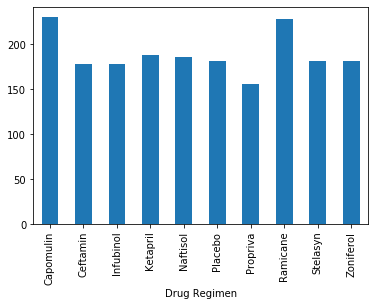

In [25]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mice_in_treatment = drop_duplicate_mouse.groupby(["Drug Regimen"])["Mouse ID"].count()
mice_in_treatment.plot(kind = "bar", x = "Drug Regimen", y = mice_in_treatment) 
mice_in_treatment

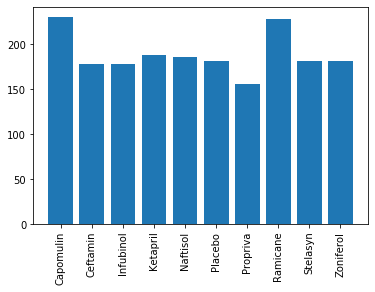

In [27]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
plt.bar(mice_in_treatment.index.values, mice_in_treatment.values)
plt.xticks(rotation=90)
plt.show()


Sex
Female    930
Male      958
Name: Sex, dtype: int64

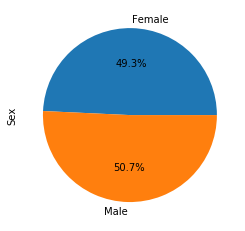

In [29]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

distribution_of_sexes = drop_duplicate_mouse.groupby(["Sex"])["Sex"].count()

distribution_of_sexes.plot(kind = "pie",autopct="%1.1f%%")
distribution_of_sexes


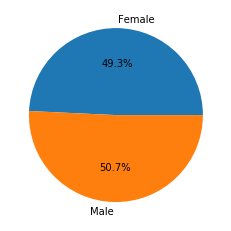

In [31]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(distribution_of_sexes.values, labels=distribution_of_sexes.index.values,autopct="%1.1f%%")
plt.show()


## Quartiles, Outliers and Boxplots

In [32]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = drop_duplicate_mouse.groupby(["Mouse ID"])["Timepoint"].max()
last_timepoint = last_timepoint.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_tumor_volume = pd.merge(last_timepoint,drop_duplicate_mouse,on=["Mouse ID", "Timepoint"],how="left")
merge_tumor_volume

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
244,z435,10,48.710661,0,Propriva,Female,12,26
245,z578,45,30.638696,0,Ramicane,Male,11,16
246,z581,45,62.754451,3,Infubinol,Female,24,25
247,z795,45,65.741070,3,Naftisol,Female,13,29


In [36]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
treatment = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_list = []
for drug in treatment:

    tumor_volume = merge_tumor_volume.loc[merge_tumor_volume ["Drug Regimen"]==drug, "Tumor Volume (mm3)"]
    tumor_list.append(tumor_volume)
   
    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(f"The lower quartile of occupancy is: {lowerq}")
    print(f"The upper quartile of occupancy is: {upperq}")
    print(f"The interquartile range of occupancy is: {iqr}")
    print(f"The the median of occupancy is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")


    # Determine outliers using upper and lower bounds
    outlier = tumor_volume.loc[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]
    outlier 

The lower quartile of occupancy is: 32.37735684
The upper quartile of occupancy is: 40.1592203
The interquartile range of occupancy is: 7.781863460000004
The the median of occupancy is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
The lower quartile of occupancy is: 31.56046955
The upper quartile of occupancy is: 40.65900627
The interquartile range of occupancy is: 9.098536719999998
The the median of occupancy is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
The lower quartile of occupancy is: 54.04860769
The upper quartile of occupancy is: 65.52574285
The interquartile range of occupancy is: 11.477135160000003
The the median of occupancy is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
The lower quartile of occupancy is: 48.72207785
The upper quartile of occupancy is: 64.29983003
The inte

{'whiskers': [<matplotlib.lines.Line2D at 0x2e161f9af48>,
 'caps': [<matplotlib.lines.Line2D at 0x2e161fa2c88>,
 'boxes': [<matplotlib.lines.Line2D at 0x2e161f88e48>,
 'medians': [<matplotlib.lines.Line2D at 0x2e161fa7e48>,
 'fliers': [<matplotlib.lines.Line2D at 0x2e161fa7f48>,
 'means': []}

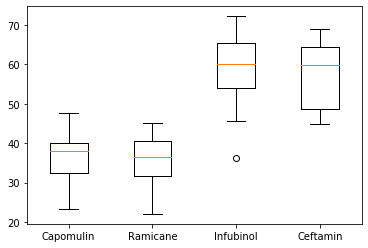

In [37]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_list, labels= treatment )

## Line and Scatter Plots

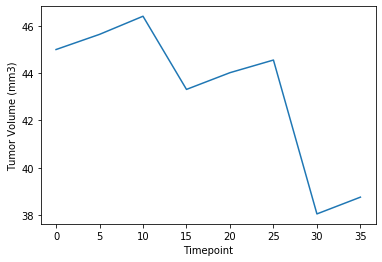

In [39]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_mice = drop_duplicate_mouse.loc[drop_duplicate_mouse["Drug Regimen"] == "Capomulin"]

mouse_id = capomulin_mice.loc[drop_duplicate_mouse["Mouse ID"] == "j246"] 
x = mouse_id["Timepoint"] 
y = mouse_id["Tumor Volume (mm3)"] 
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.plot(x,y)

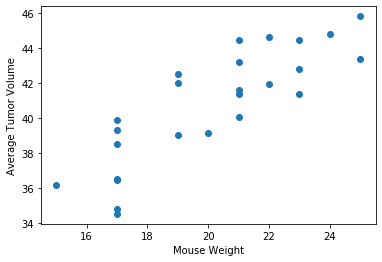

In [44]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_average = capomulin_mice.groupby("Mouse ID").mean()
x = capomulin_average["Weight (g)"]
y = capomulin_average["Tumor Volume (mm3)"]

plt.scatter(x,y)
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume')
plt.show()

## Correlation and Regression

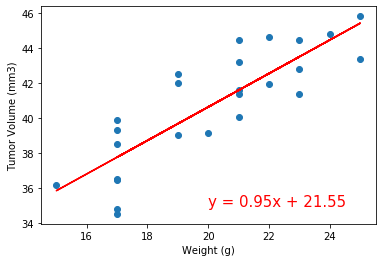

In [48]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x = capomulin_average["Weight (g)"]
y = capomulin_average["Tumor Volume (mm3)"]
corr=round(st.pearsonr(x,y)[0],2)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(20,35),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()